# 1- First we have to read and load the data
# 2- Next we have to clean the data and Featurize the columns (categorical, and numerical)
# 3- Create the features
# 4- Define our Inputs and label
# 5- Train Test Split
# 6- Create our input functions using estimator API
# 7- Create and Train our model -- We will use LinearClassification and         DNNClassification
# 8- Evaluate our model
# 9- Predict giving it unkown data

# -------------------------------------------------------------------------------------------------------

# Read and load the data

In [1]:
import pandas as pd

In [2]:
diabetes_data = pd.read_csv("Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv")

In [3]:
diabetes_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [16]:
diabetes_data.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

# Data Cleaning

In [17]:
# normal distribute some features
columns_to_distribute = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [18]:
# normalizing the features
diabetes_data[columns_to_distribute] = diabetes_data[columns_to_distribute].apply(lambda x: (x-x.min()) / (x.max() - x.min()))

In [19]:
diabetes_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [20]:
# now to use estimator we have to pass the feature

In [21]:
import tensorflow as tf

In [42]:
# create the features for the numeric columns
num_preg = tf.feature_column.numeric_column('Number_pregnant')
glu_concentration = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [114]:
# create features for the categorical {Groups}
grp = tf.feature_column.categorical_column_with_vocabulary_list("Group", ['A','B','C','D'])

In [115]:
# plotting age
import matplotlib.pyplot as plt
%matplotlib inline

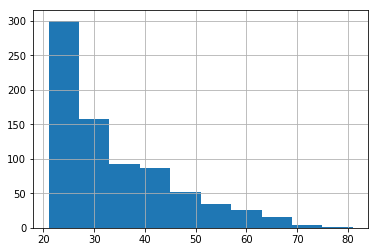

In [116]:
diabetes_data['Age'].hist()

In [46]:
# we will categorize ages from 20 - 30, 30 - 40, 40-50....
age_grp = tf.feature_column.bucketized_column(age,[20,30,40,50,60,70,80])

# Creating the features

In [117]:
feat_col = [num_preg,glu_concentration,blood_pressure,triceps,bmi,pedigree,grp]

# Define Input and label

In [118]:
# input
x_data = diabetes_data.drop('Class', axis = 1)
# output
label = diabetes_data['Class']

In [119]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


# Train Test Split

In [73]:
# module to train and test split
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_data,label,test_size = 0.3,random_state=101)

# Creating inputs and test using estimator

In [80]:
input_function = tf.estimator.inputs.pandas_input_fn(x= X_train,y = y_train, batch_size=10,num_epochs=1000,shuffle = False)

# Create and Train our model

In [81]:
model = tf.estimator.LinearClassifier(feature_columns = feat_col,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmp9jw6xha6', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000013897F77198>, '_service': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_is_chief': True, '_save_checkpoints_steps': None, '_train_distribute': None, '_session_config': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_master': '', '_evaluation_master': ''}


In [82]:
model.train(input_fn= input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\user\AppData\Local\Temp\tmp9jw6xha6\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 459.943
INFO:tensorflow:step = 101, loss = 6.935746 (0.219 sec)
INFO:tensorflow:global_step/sec: 789.503
INFO:tensorflow:step = 201, loss = 6.9393377 (0.127 sec)
INFO:tensorflow:global_step/sec: 748.263
INFO:tensorflow:step = 301, loss = 7.9855866 (0.135 sec)
INFO:tensorflow:global_step/sec: 596.826
INFO:tensorflow:step = 401, loss = 6.6577435 (0.170 sec)
INFO:tensorflow:global_step/sec: 593.301
INFO:tensorflow:step = 501, loss = 5.918497 (0.166 sec)
INFO:tensorflow:global_step/sec: 771.285
INFO:tensorflow:step = 601, loss = 4.0481977 (0.131 sec)
INFO:tensorflow:global_step/sec:

# Evaluate our Model

In [86]:
eval_input_function = tf.estimator.inputs.pandas_input_fn(x= X_test,y=y_test,batch_size=1000,num_epochs=1000,shuffle = False)

In [87]:
result = model.evaluate(eval_input_function,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-21-13:21:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmp9jw6xha6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Finished evaluation at 2018-06-21-13:21:32
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7229437, accuracy_baseline = 0.64935064, auc = 0.8102469, auc_precision_recall = 0.6731715, average_loss = 0.5494355, global_step = 1000, label/mean = 0.35064936, loss = 549.4355, precision = 0.6976744, prediction/mean = 0.36967248, recall = 0.37037036


In [88]:
result

{'accuracy': 0.7229437,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8102469,
 'auc_precision_recall': 0.6731715,
 'average_loss': 0.5494355,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 549.4355,
 'precision': 0.6976744,
 'prediction/mean': 0.36967248,
 'recall': 0.37037036}

# Predicting

In [107]:
pred_input = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [108]:
predictions = model.predict(input_fn=pred_input)

In [ ]:
list(predictions)

# Creating features for DNN Classifier

In [122]:
# when we want to train our model for categorical features we need to embedd them
embedding_grp = tf.feature_column.embedding_column(grp,dimension=4)

In [124]:
# now create the feature
dnn_feature_col = [num_preg,glu_concentration,blood_pressure,triceps,bmi,pedigree,embedding_grp]

# Creating input for DNN Classifier

In [128]:
dnn_input_functions = tf.estimator.inputs.pandas_input_fn(x=X_train,y= y_train,batch_size=10,num_epochs=1000,shuffle = True)

# Creating and Training Model DNN Classifier

In [125]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20],feature_columns=dnn_feature_col,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\user\\AppData\\Local\\Temp\\tmpxvbpn5_5', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000013899B8A908>, '_service': None, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_is_chief': True, '_save_checkpoints_steps': None, '_train_distribute': None, '_session_config': None, '_task_type': 'worker', '_global_id_in_cluster': 0, '_log_step_count_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_master': '', '_evaluation_master': ''}


In [126]:
dnn_model.train(input_fn=input_function,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\user\AppData\Local\Temp\tmpxvbpn5_5\model.ckpt.
INFO:tensorflow:step = 1, loss = 7.029141
INFO:tensorflow:global_step/sec: 466.359
INFO:tensorflow:step = 101, loss = 7.1362357 (0.217 sec)
INFO:tensorflow:global_step/sec: 815.178
INFO:tensorflow:step = 201, loss = 6.0467606 (0.122 sec)
INFO:tensorflow:global_step/sec: 701.167
INFO:tensorflow:step = 301, loss = 8.197214 (0.144 sec)
INFO:tensorflow:global_step/sec: 622.78
INFO:tensorflow:step = 401, loss = 6.3844414 (0.162 sec)
INFO:tensorflow:global_step/sec: 716.198
INFO:tensorflow:step = 501, loss = 5.224912 (0.139 sec)
INFO:tensorflow:global_step/sec: 668.435
INFO:tensorflow:step = 601, loss = 1.7234565 (0.150 sec)
INFO:tensorflow:global_step/sec: 

# Evaluate our Model

In [132]:
dnn_eval_input_function = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=10,shuffle=False)

In [133]:
dnn_model.evaluate(dnn_eval_input_function)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-21-13:56:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmpxvbpn5_5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-21-13:56:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.77056277, accuracy_baseline = 0.64935064, auc = 0.82839507, auc_precision_recall = 0.73591447, average_loss = 0.4870319, global_step = 1000, label/mean = 0.35064936, loss = 4.870319, precision = 0.67948717, prediction/mean = 0.38388565, recall = 0.654321


{'accuracy': 0.77056277,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82839507,
 'auc_precision_recall': 0.73591447,
 'average_loss': 0.4870319,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.870319,
 'precision': 0.67948717,
 'prediction/mean': 0.38388565,
 'recall': 0.654321}

# Predict

In [134]:
dnn_predict_input_function = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=1000,num_epochs=1000,shuffle=False)

In [136]:
dnn_evaluate = dnn_model.predict(dnn_predict_input_function)

In [137]:
list(dnn_evaluate)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\user\AppData\Local\Temp\tmpxvbpn5_5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3054749], dtype=float32),
  'logits': array([-0.82136065], dtype=float32),
  'probabilities': array([0.69452506, 0.3054749 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.88407475], dtype=float32),
  'logits': array([2.0315962], dtype=float32),
  'probabilities': array([0.11592522, 0.88407475], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.15639807], dtype=float32),
  'logits': array([-1.6852763], dtype=float32),
  'probabilities': array([0.84360194, 0.15639807], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4130633], dtype=float32),
  'logits': array([-0.35131624], dtype=float32),
  'probabilities': array([0.5869368 , 0.41306332], dtype=float32)},
 {'class_